In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

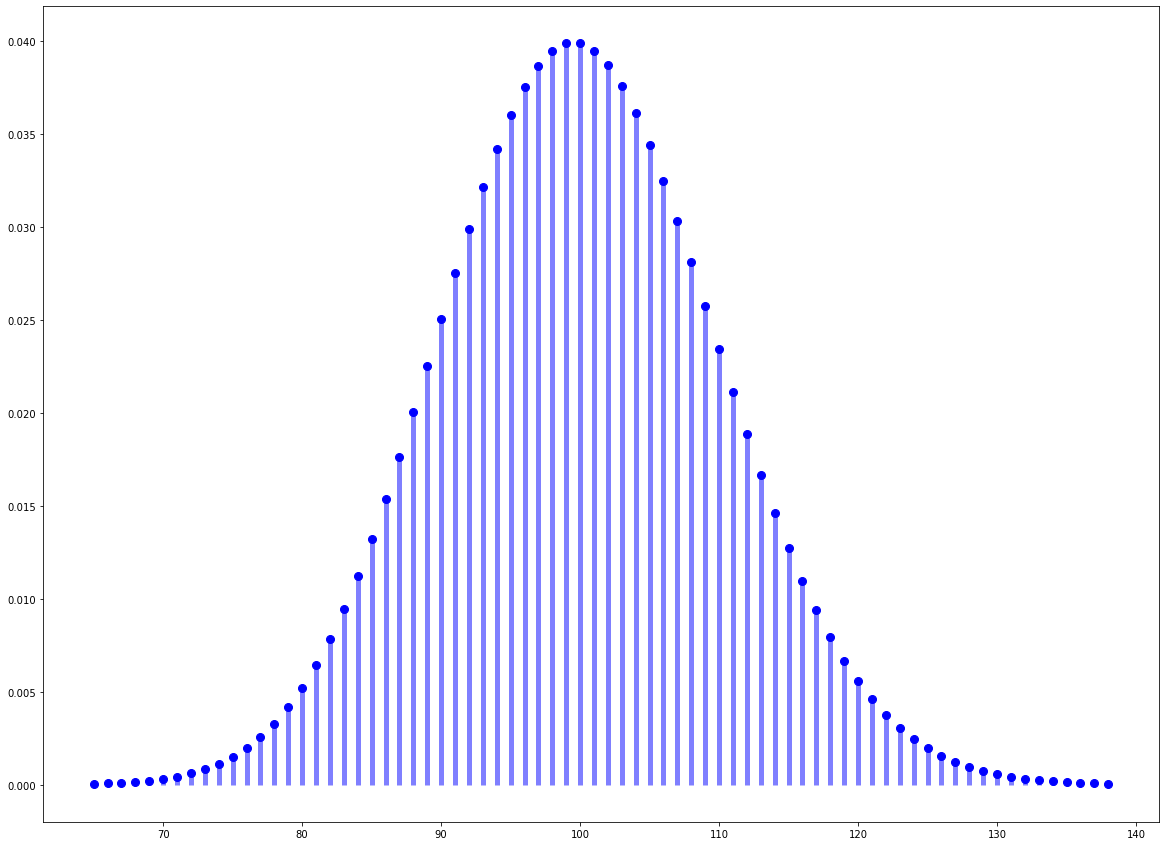

In [58]:
plt.rcParams['figure.figsize'] = 20,15
mu = 100
x = np.arange(stats.poisson.ppf(0.0001, mu),
              stats.poisson.ppf(0.9999, mu))
plt.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

Problem 1: What is the 5 sigma threshold of our background of a poisson distribution with mean 100?

In [59]:
prob = stats.norm.cdf(5)
threshold = stats.poisson.ppf(prob, 100)
print(threshold)

154.0


In [60]:
target_prob = stats.poisson.pmf(250, 100)
sigma = stats.norm.ppf(target_prob)
print(sigma, target_prob)

-12.593202957525106 1.1507087466284641e-36


Problem 2: Next let's inject a signal of strength 250, which lies around 12 sigma. After, let's see how the distribution has shifted from the injection of this signal.

In [61]:
bkgd = stats.poisson.rvs(100, size=1000000)
signal = [250]*1000000
data = bkgd + signal

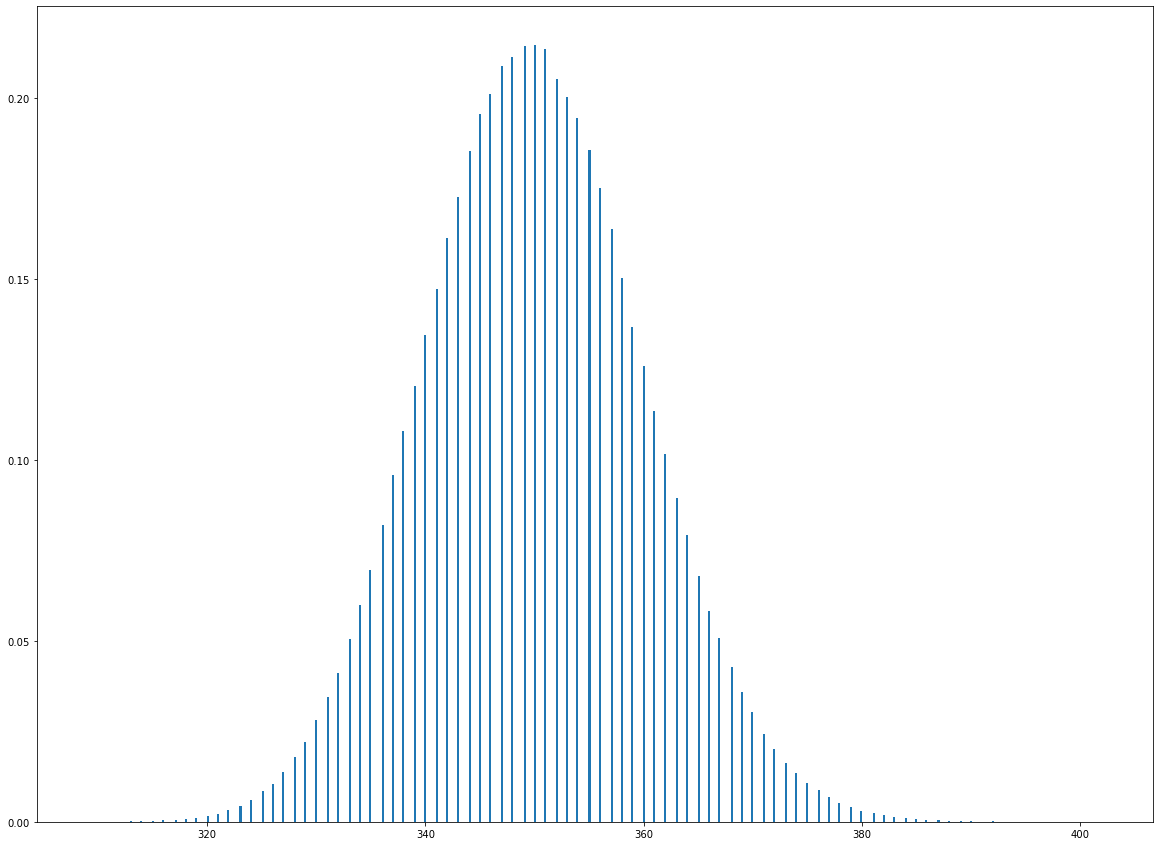

In [62]:
plt.hist(data, 500, density=True)
plt.show()

After injecting the signal, the distribution maintains its gaussian shape and has shiften to a mean of ~350. However, the width of the distribution has increased with this change. This histogram is showing the distribution of the probability of observed signal strength with a true signal of 250. This distribution maintains its symmetry, but indicates that the observed signal will always be signficantly greater than the true signal, with an average difference of 100.

Problem 3:
Next, let's take a look at a histogram comparing our true signal to our observed signal based on the background distribution of a poisson of mean 100.

In [63]:
signal_2 = stats.uniform.rvs(scale=530, size=1000000)
data_2 = bkgd + signal_2

<ipython-input-64-019fe7a43b0b>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

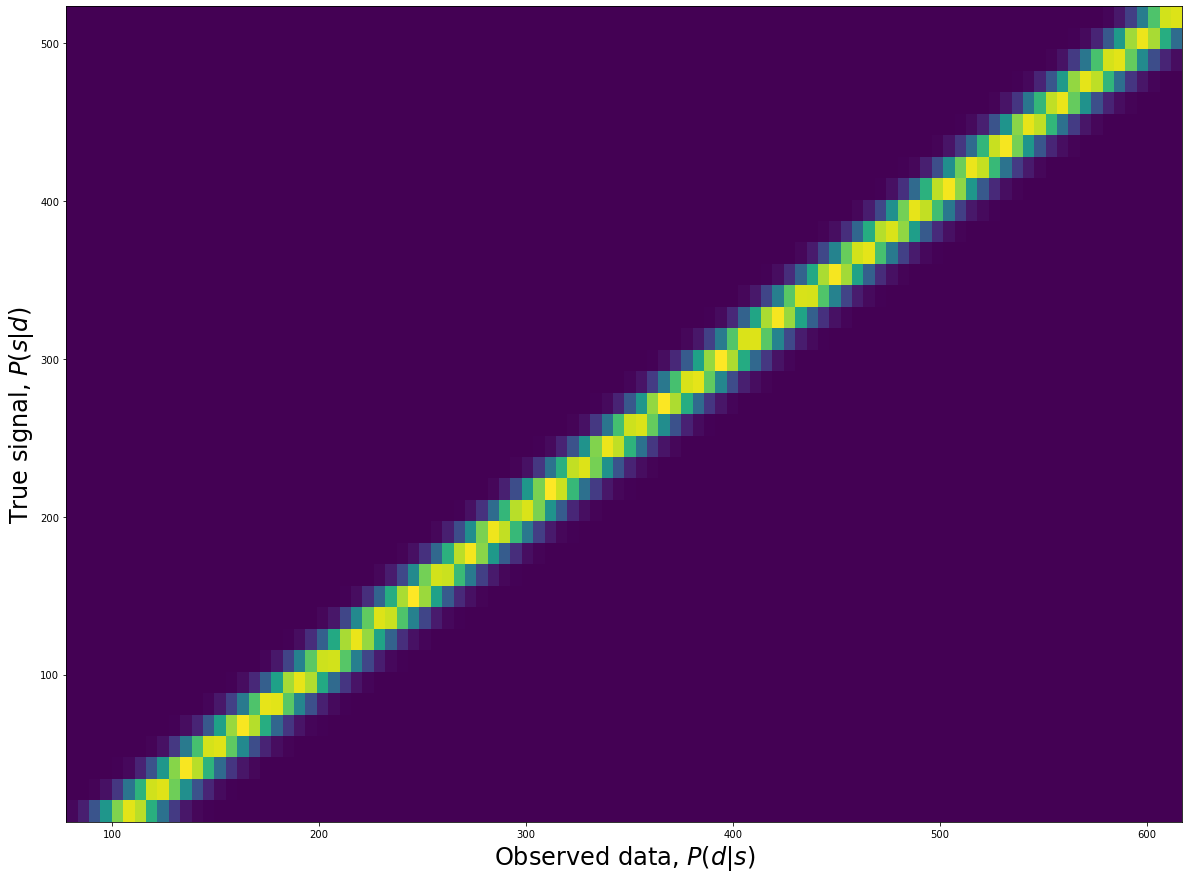

In [64]:
signaledges = np.linspace(0,530,40)
dataedges = np.linspace(75,620,100)

Psd, temp, temp2= np.histogram2d(data_2,signal_2, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

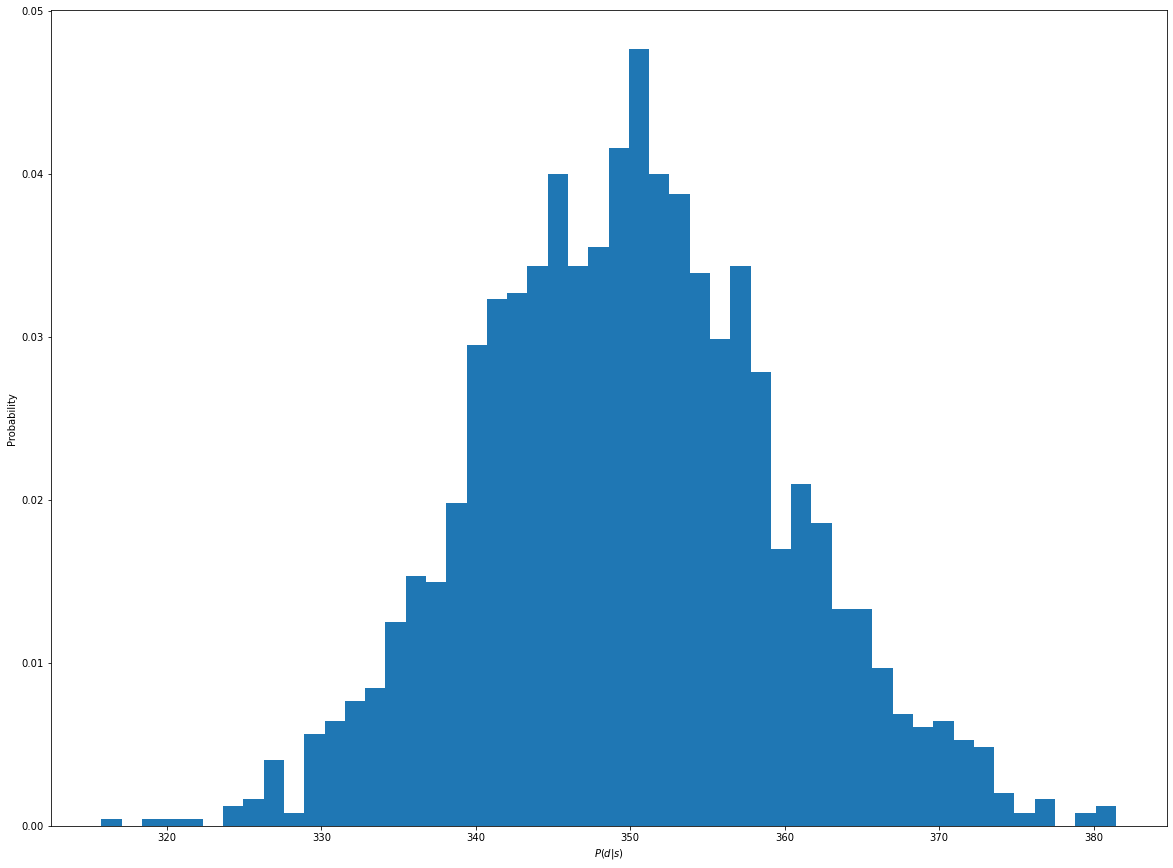

In [65]:
p_s = 250
p_d_s = [data_2[x] for x in range(len(data)) if abs(signal_2[x] - p_s) < 0.5]
plt.hist(p_d_s, 50, density=True)
plt.ylabel('Probability')
plt.xlabel('$P(d|s)$')
plt.show()

Plotted above is the probability of the observed signal at a true signal of 250. This is the same as was plotted before, which can be seen from the scale of the distribution as it tends to tail off at around 320 and 380. A threshold of 0.5 was chosen due to the discrete nature of the background distribution. One other thing to note is that the height of the distribution is greater for this plot than the one before. This is likely due to the smaller sample size of signal. Where before we were looking at 1,000,000 points of signal added to background, here we have much less, so the distribution is not as smooth nor as representative of the true probability of the observed signal, though it's the best we can get with these parameters.

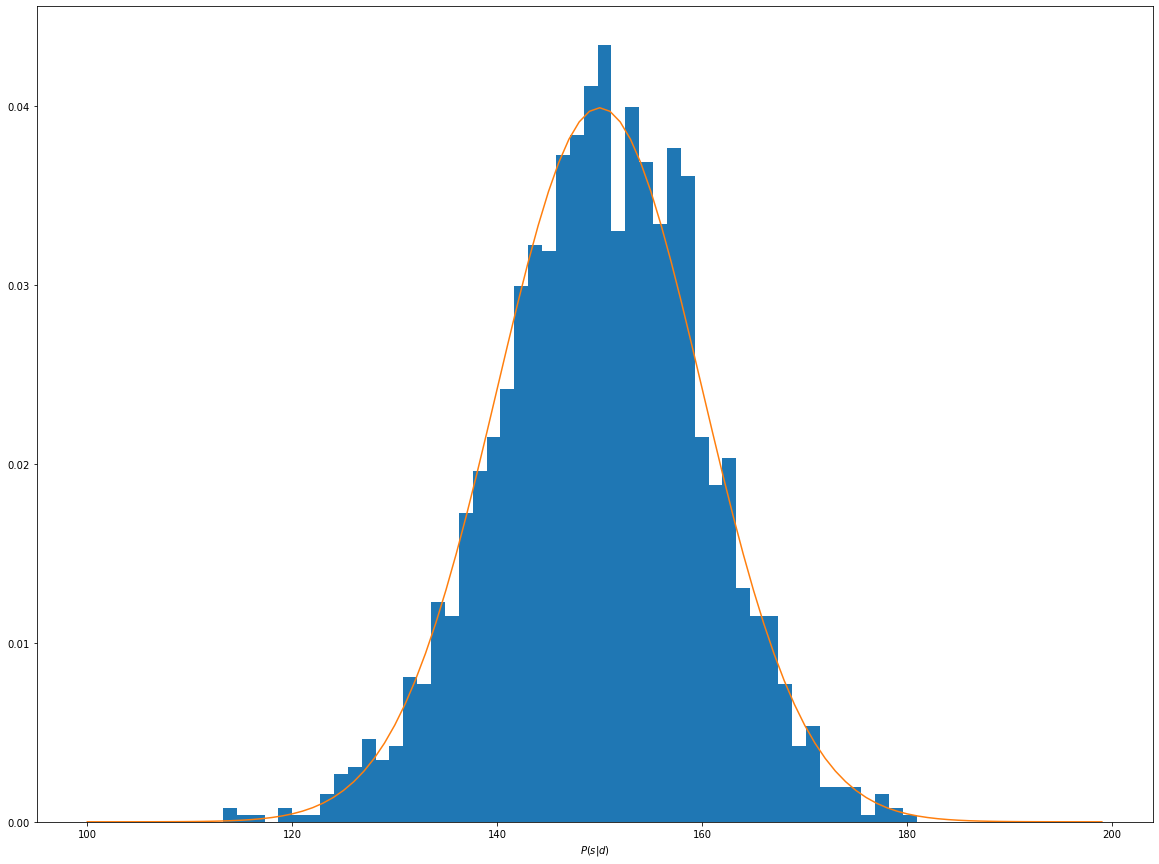

In [66]:
p_d = 250
p_s_d = [signal_2[x] for x in range(len(data)) if (abs(data_2[x] - p_d))  <= 0.5]
plt.hist(p_s_d, 50, density=True)
x = range(100, 200)
plt.plot(x, stats.norm.pdf(x, loc=150, scale=10))
plt.xlabel('$P(s|d)$')
plt.show()

Above is a distribution of the true signal given an observed signal of 250. This is in essence the inverse of the plot before. The x axis is representative of a vertical slice of the 2d histogram above with a $P(d|s)$ value of 250. The one sigma of the true signal strength based on a rough estimate of its pdf is:

In [67]:
prob = stats.norm.cdf(1)
val = stats.norm.ppf(prob, loc=150, scale=10)
print('one sigma: {} or {}'.format(val, (val-20)))

one sigma: 160.0 or 140.0


This distribution maintains the gaussian symmetry we have seen with the other distributions we plotted before. However, unlike when we plotted $P(d|s)$, this distribution is biased the opposite direction. This is because our background is centered about a positive non-zero value. As such, for any observed signal, which we observe added to the background, the true signal must always be less than that value to account for our positively valued background.